# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

### https://seaborn.pydata.org/

___
## Imports

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## distribution plots : distplot, kdeplot, rugplot

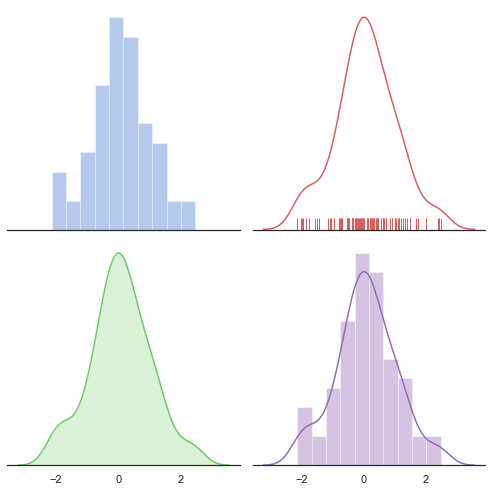

In [4]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True) ## ax burda 4 tane 2 ye 2 ax ler bir tane icin ax= 0 yapiyoruz.
sns.despine(left=True)         #######Despine grafik etrafina cerceve yapiyor.

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

## Data
Seaborn comes with built-in data sets!

In [5]:
diamonds=sns.load_dataset('diamonds')
exercise=sns.load_dataset('exercise')
flights=sns.load_dataset('flights')
geyser=sns.load_dataset('geyser')
iris=sns.load_dataset('iris')
penguins=sns.load_dataset('penguins')
planets=sns.load_dataset('planets')
mpg=sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')

## distplot¶
The distplot shows the distribution of a univariate set of observations.

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
penguins.shape

(344, 7)

In [9]:
penguins = penguins.dropna() #inplace = True ya da yazmaliyiz penguens e atmak icin orjinal data setini gunceller 

In [10]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

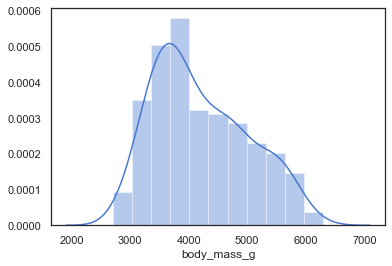

In [11]:
sns.distplot(penguins["body_mass_g"]);

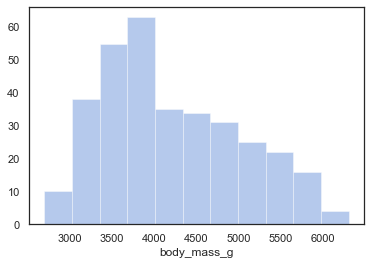

In [12]:
sns.distplot(penguins["body_mass_g"],kde=False); # kde default true istemiyorsak kaldiriyoruz.

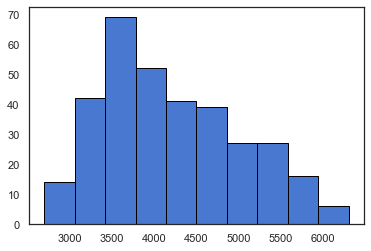

In [13]:
plt.hist(penguins["body_mass_g"], edgecolor = "black"); #edgecolor kenarlari koyu yapiyor.

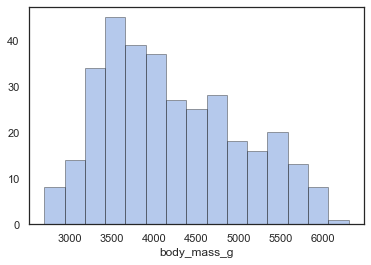

In [14]:
sns.distplot(penguins["body_mass_g"],bins=15, hist_kws=dict(edgecolor = "k", linewidth =1), kde= False); 

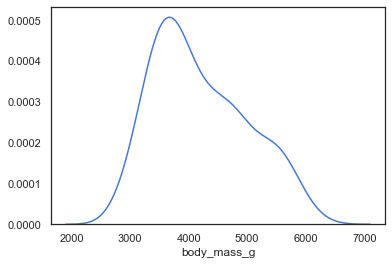

In [15]:
sns.distplot(penguins["body_mass_g"], hist = False) 

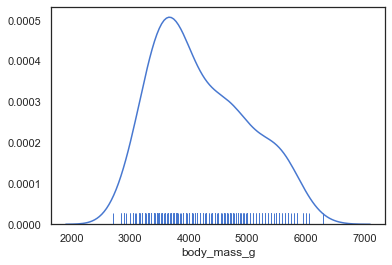

In [16]:
sns.distplot(penguins["body_mass_g"],hist = False, rug =True) ## yogunluk asagiya verdi 

In [17]:
 sns.set()

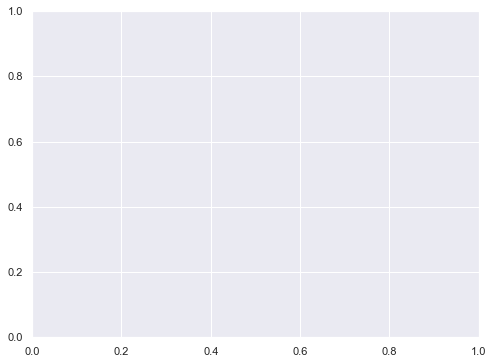

In [18]:
Ali, veli = plt.subplots(figsize = (8,6))

In [19]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


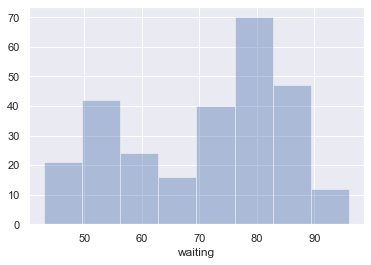

In [20]:
sns.distplot(geyser["waiting"], kde=False) # bir seyin ortalamasini biliyor olmak her zaman dogru olmaz asagidaki gibi
# ortalama &0 ama yigilma 50 lerde ve 80 lerde mean ile alakasiz, futbolcunun orta sagada hic oynamamsi gibi.

In [21]:
geyser["waiting"].mean()

70.8970588235294

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


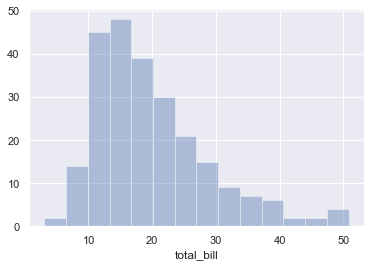

In [23]:
sns.distplot(tips["total_bill"], kde=False)

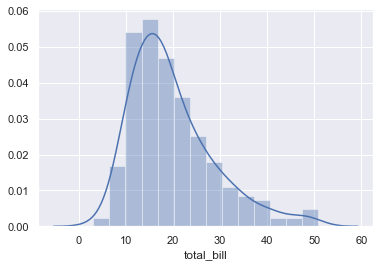

In [24]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

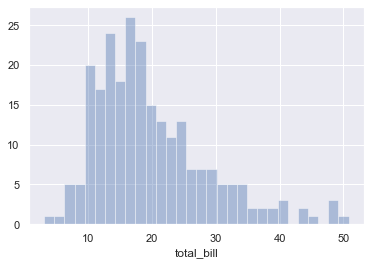

In [25]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

### kind='scatter'

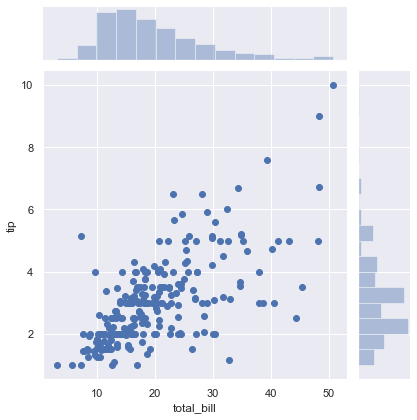

In [26]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter') # joinplot hem hist hem scatter gorulebilir.

In [27]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\ilkca\anaconda3\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


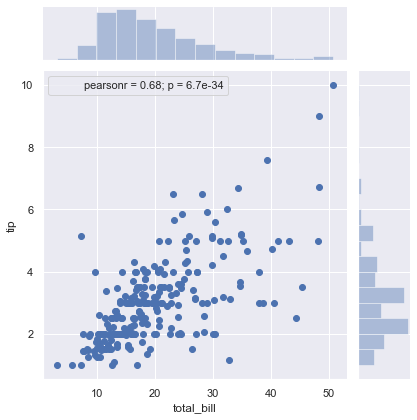

In [30]:
import scipy.stats as stats  #### PERSONR = 0.68 ve p = 6.7e-34 degerinin cok cok dusuk olmasi onemli.
j=sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
j.annotate(stats.pearsonr);

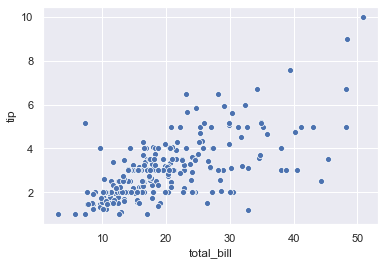

In [31]:
sns.scatterplot(x="total_bill", y="tip", data=tips)  #extra

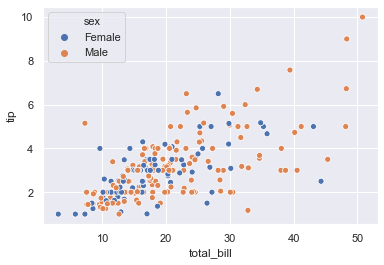

In [32]:
sns.scatterplot(x="total_bill", y="tip", hue="sex", data=tips)

In [ ]:
#scatter plotta yougnlasma net gorulmaz bunun icin KDE yi incelemek daha faydalidir.

### kind='hex'

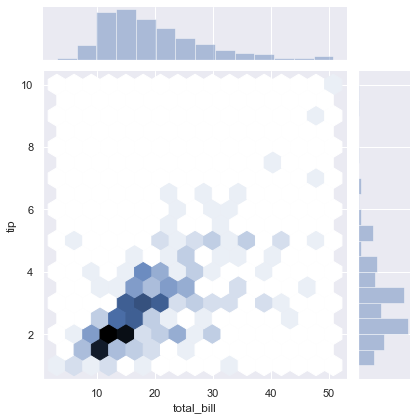

In [60]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') ## burda yogunlasma net gorunuyor mesela 'hex' gibi.

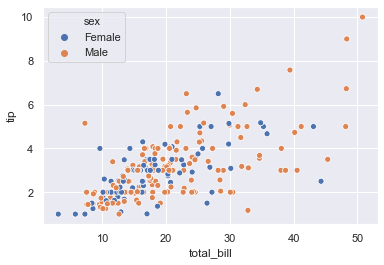

In [33]:
sns.scatterplot(x='total_bill',y='tip',data=tips, hue= "sex")

### kind='reg

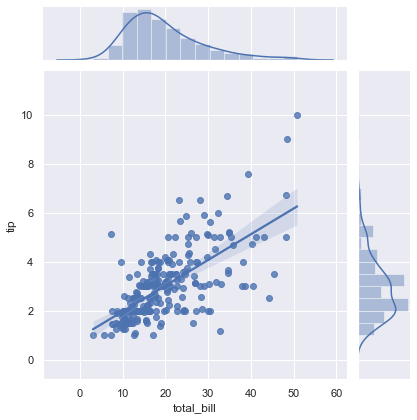

In [61]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### golgeler ###confidence interval araligi %95 arasi burda olur bu dogru demek 

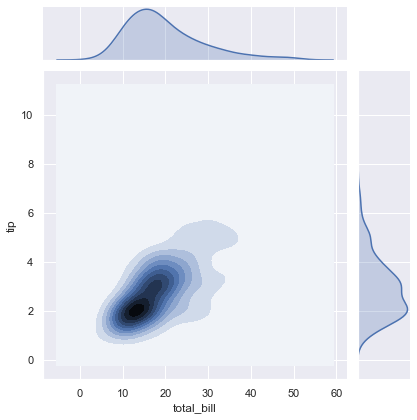

In [66]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') ## burda da kind = kde yine yogunlasma takip edebiliriz.

In [55]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [56]:
np.corrcoef(tips.total_bill, tips.tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

In [ ]:
sns.pairplot(tips) ###burda tips adata veri seti cizilir

In [67]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


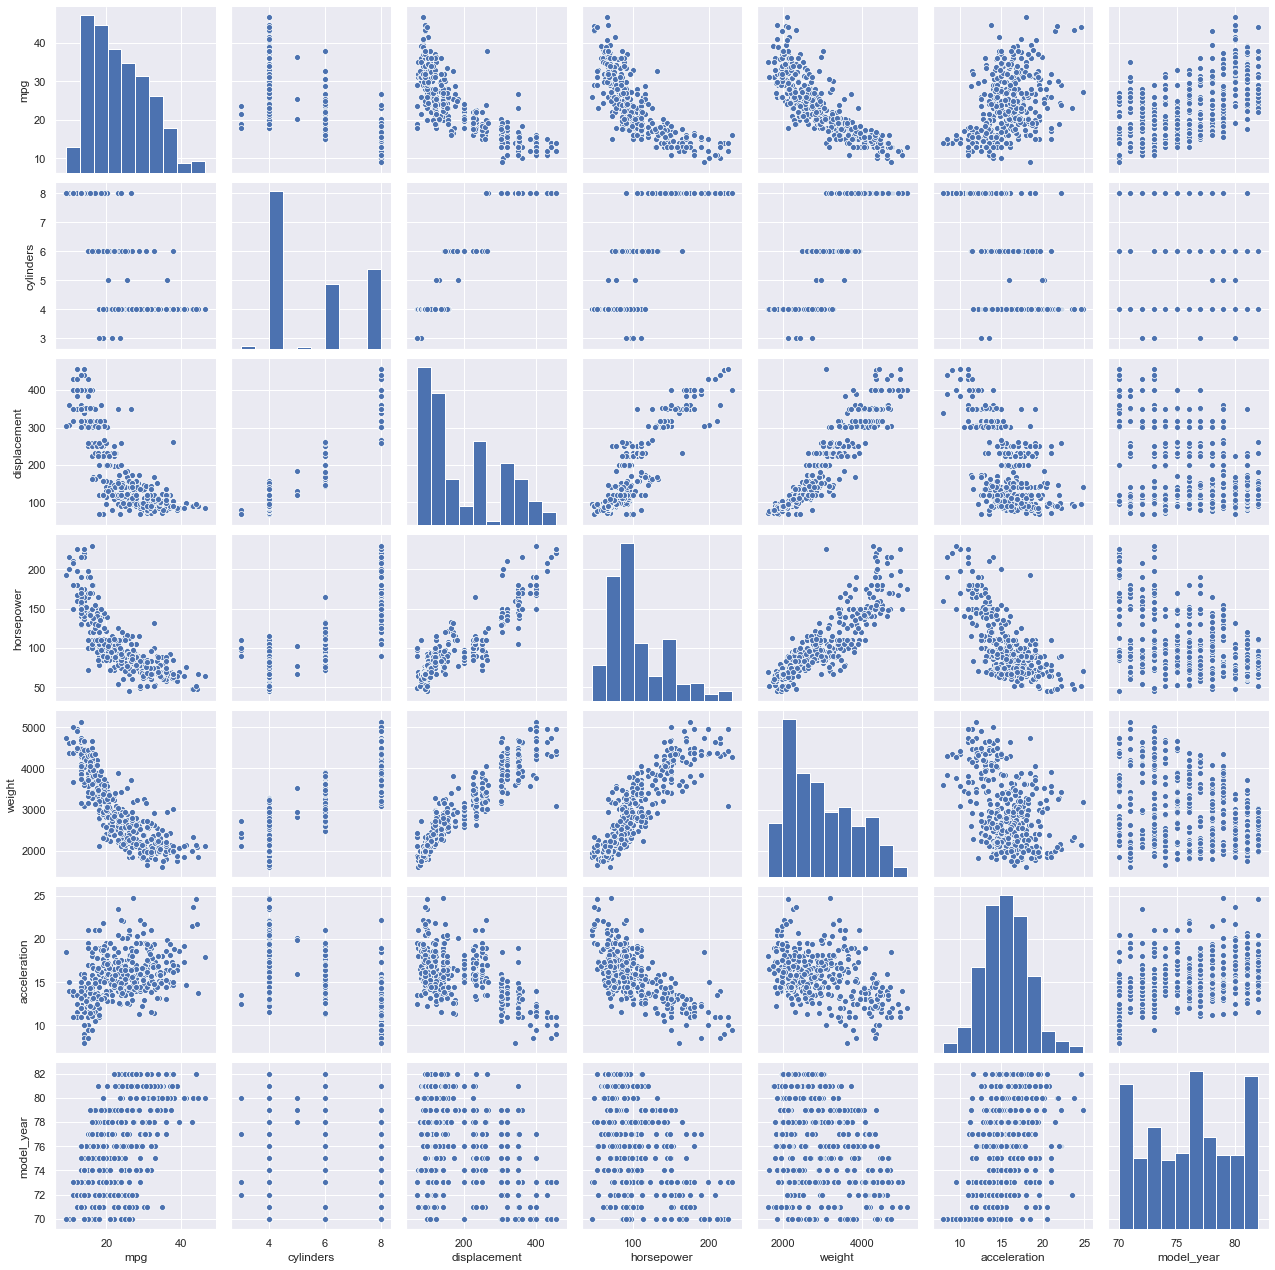

In [68]:
sns.pairplot(mpg);

In [70]:
mpg = mpg.drop(["displacement"], axis = 1)


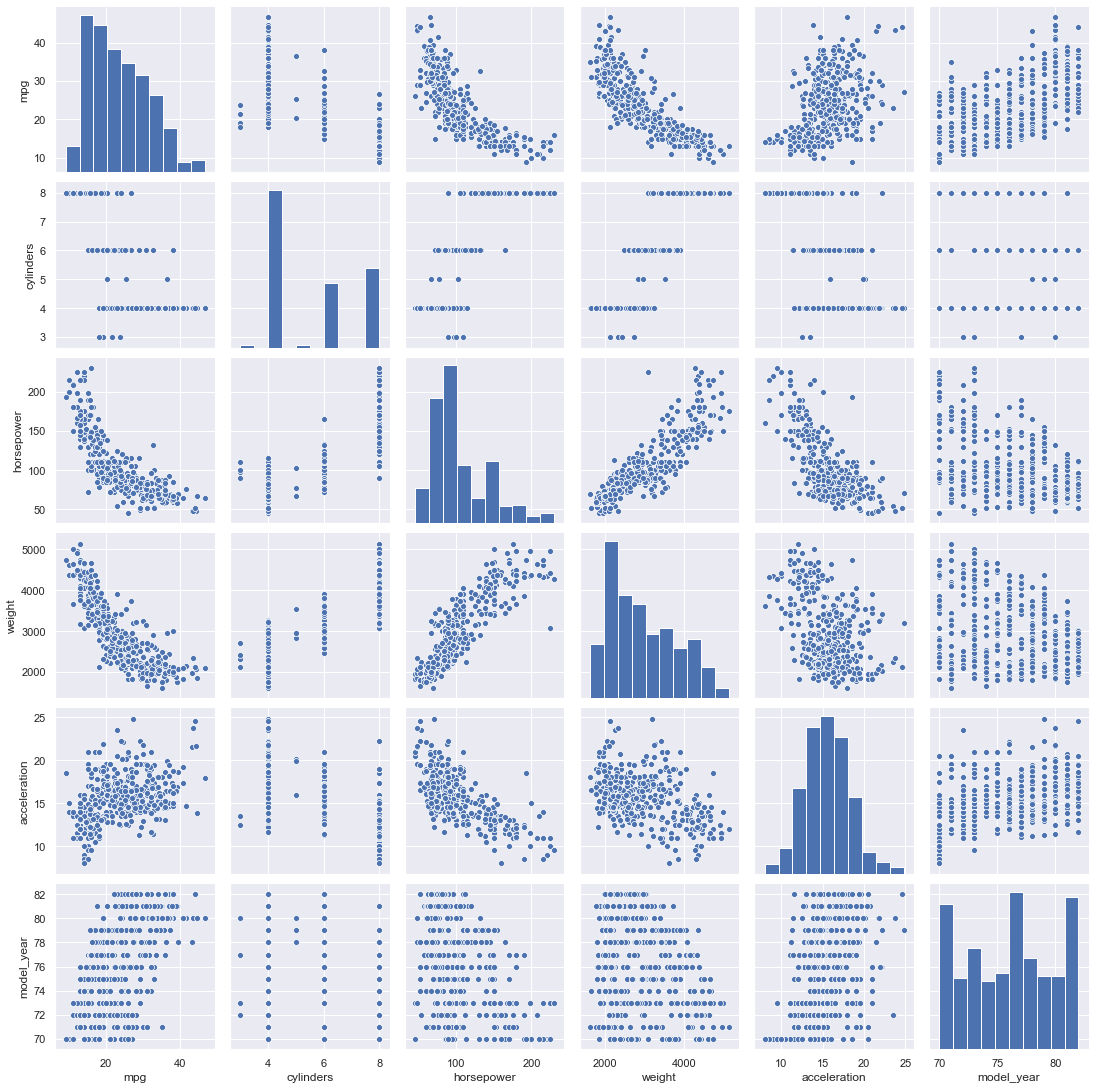

In [71]:
sns.pairplot(mpg);

In [ ]:
#mpg leri groupby ile yillarina gore cizebilir miyiz

In [75]:
mpg.groupby("model_year")["mpg"].mean()

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

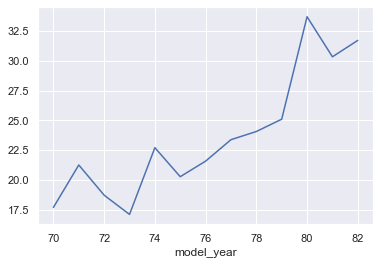

In [76]:
mpg.groupby("model_year")["mpg"].mean().plot()#mpg.groupby('model_year').mpg.mean()

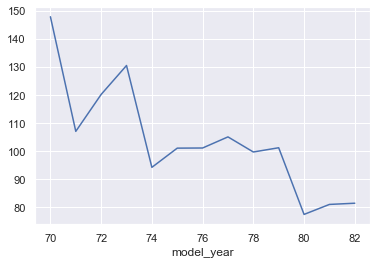

In [78]:
mpg.groupby('model_year')["horsepower"].mean().plot()

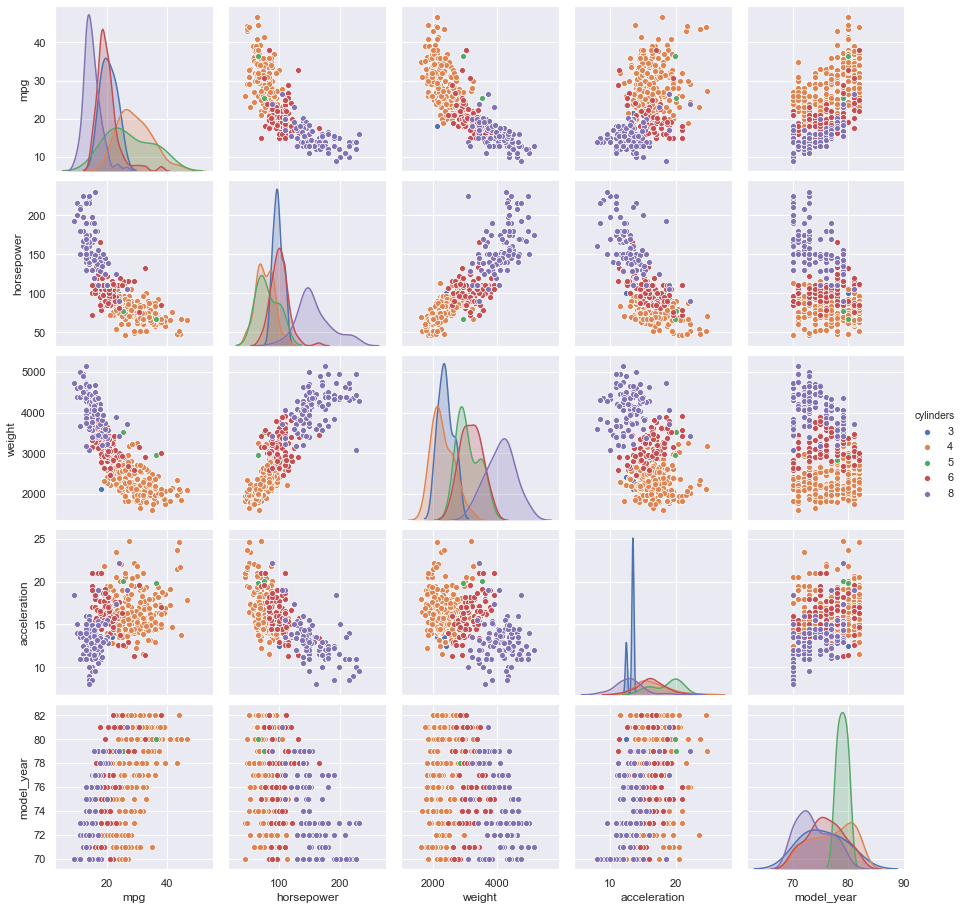

In [81]:
sns.pairplot(mpg,hue='cylinders')

In [ ]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

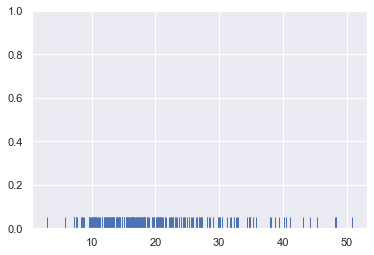

In [34]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

In [ ]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [ ]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

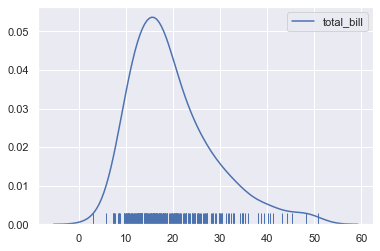

In [35]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

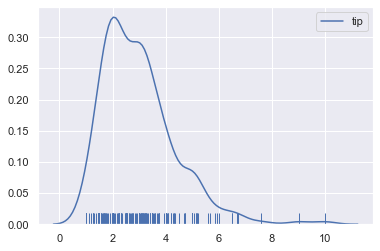

In [36]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Great Job!